# Fraud In Financial Payment Services

## INTRODUCTION

There is a lack of public available datasets on financial services and specially in the emerging mobile money transactions domain. Financial datasets are important to many researchers and in particular to us performing research in the domain of fraud detection. Part of the problem is the intrinsically private nature of financial transactions, that leads to no publicly available datasets.

We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods.

The objective of the project is to find whether the transaction is fraud or not. It is a classification task of detecting fraud.

In [1]:
# Importing necessary libraries for data cleaning and visulaization. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the data into "df" dataframe with read_csv function as it is csv file.

df = pd.read_csv(r"D:\FINAL PROJECT\PS_20174392719_1491204439457_log.csv")

In [3]:
# Previewing the first 5 rows of the dataset.

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Previewing the last 5 rows of the dataset.

df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
# Checking the shape (rows and columns) of the dataset.

df.shape

(6362620, 11)

In [6]:
# Printing all the column names of the dataset.

df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
# Observing the type of data in each column. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
# Getting statistical details (count, mean, median, etc) of data.

df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## DATA CLEANING

In [9]:
# Checking if there is any duplicate rows in the data.

df.duplicated().sum()

0

In [10]:
# Checking if there is any null values in any column.

df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Observation - 
1. Each row in the dataset occurs only once. There are no duplicate entries for any particular row. By having no duplicate rows, we can confidently perform further tasks or modeling without concerns about data redundancy or bias.


2. There are no missing or null values in the dataset. Every data point has a valid and non-null value. Similarly, the absence of null values means that we have a complete dataset for analysis, without any missing information. This allows us to obtain accurate insights and make informed decisions based on the available data.

In [11]:
# Checking number of unique values in all the columns. 

df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [12]:
# Filtering out the rows where it is flagged fraud. 

df[df['isFlaggedFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [13]:
# Creating a list of indices where the column ('isFlaggedFraud') of df is 1. 

rows_drop = df[df['isFlaggedFraud'] == 1].index

In [14]:
rows_drop

Int64Index([2736446, 3247297, 3760288, 5563713, 5996407, 5996409, 6168499,
            6205439, 6266413, 6281482, 6281484, 6296014, 6351225, 6362460,
            6362462, 6362584],
           dtype='int64')

In [15]:
# Dropping the rows saved in rows_drop and creating new dataset. 

df1 = df.drop(rows_drop, axis = 0)

In [16]:
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [17]:
# Filtering out the rows where the customer is Merchant.

df1[df1.nameDest.str.startswith('M')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


In [18]:
# Checking if any Merchant type customer has done any fraud.

df1[(df1.nameDest.str.startswith('M')) & (df1.isFraud == 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [19]:
# Creating a list of indices where the customer type is Merchant.

rows_drop1 = df1[df1.nameDest.str.startswith('M')].index

In [20]:
rows_drop1

Int64Index([      0,       1,       4,       5,       6,       7,       8,
                 11,      12,      13,
            ...
            6362307, 6362308, 6362309, 6362310, 6362311, 6362312, 6362314,
            6362316, 6362318, 6362319],
           dtype='int64', length=2151495)

In [21]:
# Dropping rows from df saved in rows_drop1.

df1.drop(rows_drop1, inplace = True, axis = 0)

In [22]:
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0
10,1,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.00,157982.12,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Explanation about dropping the rows -

1. Firstly, we droppped the rows where the column("isFlaggedFraud") was marked with 1. A model was made where any transfer of more than 200.00 was made in a single transaction was flagged as illegal attempt to control massive transfers. So, that is not an actual fraud. 


2. Secondly, we dropped the rows where the customer was Merchant. Because we don't have information about them and they were around one-third of the dataset so couldn't be filled. 

In [23]:
# Filtering out the rows where the column ('isFraud') equals 1.

df1[df1['isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [24]:
# Finding unique values in column ('type') when the column ('isFraud') equals 1. 

df1[df1['isFraud'] == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [25]:
# Checking the number of rows where type column is either 'TRANSFER' or 'CASH_OUT'.

df1[(df1.type == 'TRANSFER') | (df1.type == "CASH_OUT")]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [26]:
# Creating a new dataframe where only type of transaction is either 'TRANSFER' or 'CASH_OUT'.

df2 = df1[(df1.type == 'TRANSFER') | (df1.type == 'CASH_OUT')]

In [27]:
df2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [28]:
# Dropping the columns('nameOrig', 'nameDest', 'isFlaggedFraud').

df2.drop(columns = ['nameOrig', 'nameDest', 'isFlaggedFraud'], inplace = True)

In [29]:
# Filtering out rows where columns ('amount', 'oldbalanceOrg', 'newbalanceOrig') is 0 and column ('isFraud') is 1.

df2[(df2.amount == 0) & (df2.oldbalanceOrg == 0) & (df2.newbalanceOrig == 0) & (df2.isFraud == 1)]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2736447,212,CASH_OUT,0.0,0.0,0.0,0.00,0.00,1
3247298,250,CASH_OUT,0.0,0.0,0.0,0.00,0.00,1
3760289,279,CASH_OUT,0.0,0.0,0.0,538547.63,538547.63,1
5563714,387,CASH_OUT,0.0,0.0,0.0,7970766.57,7970766.57,1
5996408,425,CASH_OUT,0.0,0.0,0.0,76759.90,76759.90,1
5996410,425,CASH_OUT,0.0,0.0,0.0,2921531.34,2921531.34,1
6168500,554,CASH_OUT,0.0,0.0,0.0,230289.66,230289.66,1
6205440,586,CASH_OUT,0.0,0.0,0.0,1328472.86,1328472.86,1
6266414,617,CASH_OUT,0.0,0.0,0.0,0.00,0.00,1
6281483,646,CASH_OUT,0.0,0.0,0.0,0.00,0.00,1


In [30]:
# Creating the list of indices where columns ('amount', 'oldbalanceOrg', 'newbalanceOrig') is 0 and column ('isFraud') is 1.

rows_drop2 = df2[(df2.oldbalanceOrg == 0) & (df2.isFraud == 1) & (df2.amount == 0) & (df2.newbalanceOrig == 0)].index

In [31]:
rows_drop2

Int64Index([2736447, 3247298, 3760289, 5563714, 5996408, 5996410, 6168500,
            6205440, 6266414, 6281483, 6281485, 6296015, 6351226, 6362461,
            6362463, 6362585],
           dtype='int64')

In [32]:
# Dropping rows from df saved in rows_drop2.

df2.drop(rows_drop2, inplace = True)

In [33]:
df2

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1


## Explanation about droping rows and creating new dataset -

1. Firstly, we checked the rows where their is a fraud. Then, we checked the unique values in column ("type") when it is a fruad. From that we understood that only 'TRANSFER' and 'CASH_OUT' values has fraud in it.


2. Secondly, we created a new dataset where column ("type") only had 'TRANSFER' and 'CASH_OUT' values. Because the other type of values in column ('type') has no fraud. So, we are going to drop those columns. 


3. Thirdly, we have dropped the rows where it is marked fraud but the value is '0' in columns ('amount', 'oldbalanceOrg', 'newbalanceOrig'). Because when there is no amount transfered and no balance in the account of the person who started the transaction is 0, there can be no fraud. 


4. Lastly, we also dropped 3 columns ('nameOrig', 'nameDest', 'isFlaggedFraud') as there is no need for them. 

<AxesSubplot:ylabel='amount'>

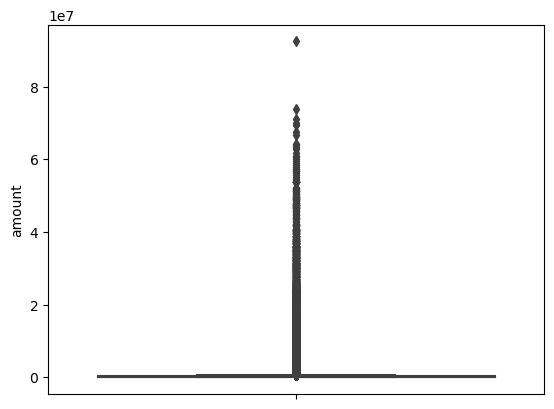

In [34]:
# Checking for outliers in amount column through boxplot. 

sns.boxplot(y = df2.amount)

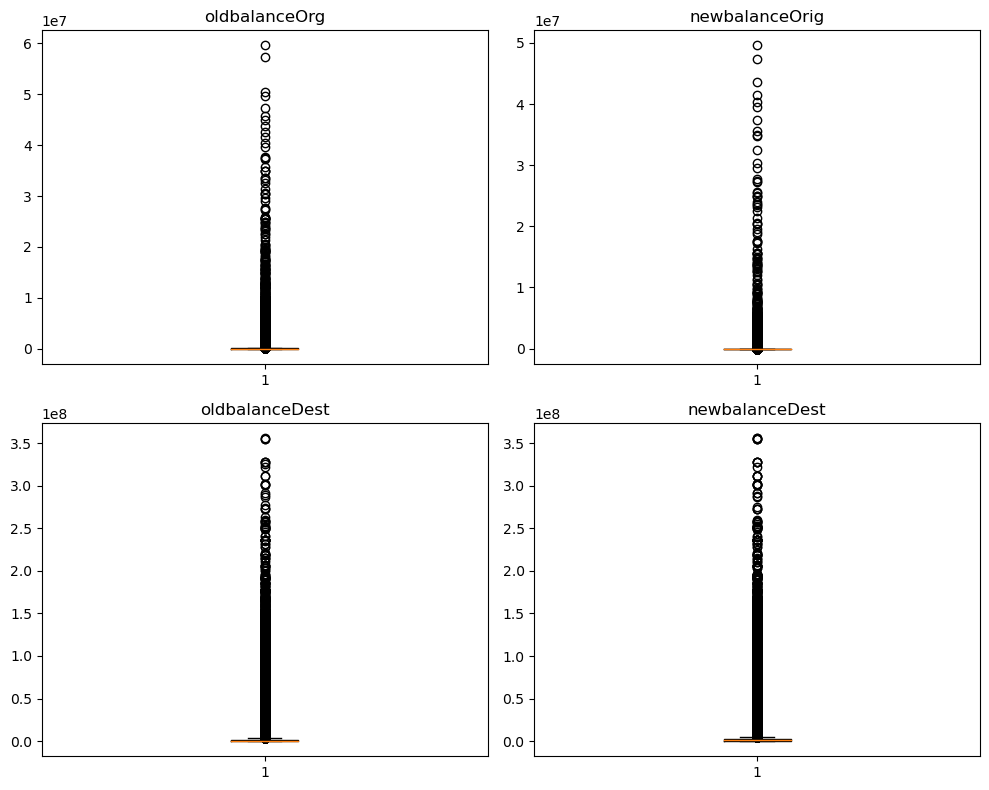

In [35]:
# Checking for outliers in other columns.

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].boxplot(df2.oldbalanceOrg)
axs[0, 0].set_title('oldbalanceOrg')

axs[0, 1].boxplot(df2.newbalanceOrig)
axs[0, 1].set_title('newbalanceOrig')

axs[1, 0].boxplot(df2.oldbalanceDest)
axs[1, 0].set_title('oldbalanceDest')

axs[1, 1].boxplot(df2.newbalanceDest)
axs[1, 1].set_title('newbalanceDest')

plt.tight_layout()
plt.show()

## Explanation about outliers - 

1. All the numerical columns shows around 99% outliers. We can't discard this outliers because it will lead to loss of information. And, removing this many outliers will distort the overall understanding of the data. Which will lead to bias or affect the validity of the conclusion. 


2. We then remove all the rows where transaction amount was more than 1 crore. We did check if those rows had fraud but they did'nt. The reason for removing those rows are to prevent them from dominating the analysis or statistical calculations. It also helps to make the data more manageable and aligned with the typical range of transaction amounts observed in the majority of cases.

In [36]:
# Filtering out the rows where amount is more than 1 crore and there is a fraud. 

df2[(df2.amount > 10000000) & (df2.isFraud == 1)]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud


In [37]:
# Creating a list of indices where amount is more than 1 crore.

rows_drop3 = df2[df2.amount > 10000000].index

In [38]:
rows_drop3

Int64Index([3591182, 3592661, 3610921, 3611293, 3611622, 3623211, 3623212,
            3627566, 3627567, 3633292,
            ...
            6250656, 6252197, 6254047, 6268094, 6268541, 6268840, 6271814,
            6273122, 6297147, 6298360],
           dtype='int64', length=2443)

In [39]:
# Dropping rows from df saved in rows_drop3.

df2.drop(rows_drop3, inplace = True, axis = 0)

In [40]:
df2

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1


## EXPLORATORY DATA ANALYSIS

In [41]:
# Creating a list with value counts of column ('type').

counts = df.type.value_counts()
list = []

for i in counts:
    list.append(i)

print(list)

[2237500, 2151495, 1399284, 532909, 41432]


In [42]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

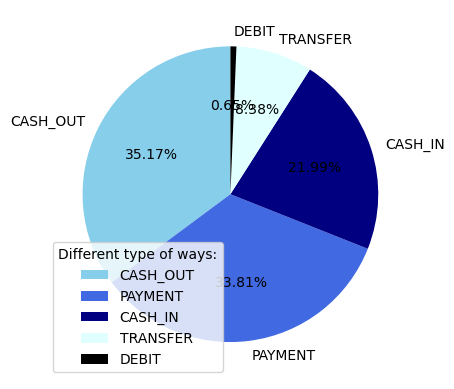

In [43]:
# Creating a pie chart representing the proportion of different types of transfers.

y = list
mylabels = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT']
mycolors = ['SkyBlue', 'RoyalBlue', 'Navy', 'LightCyan', 'Black']

plt.pie(y, labels = mylabels, startangle = 90, colors = mycolors, autopct = '%1.2f%%')
plt.legend(title = "Different type of ways:", loc = 'lower left')
plt.show

<AxesSubplot:xlabel='step', ylabel='Density'>

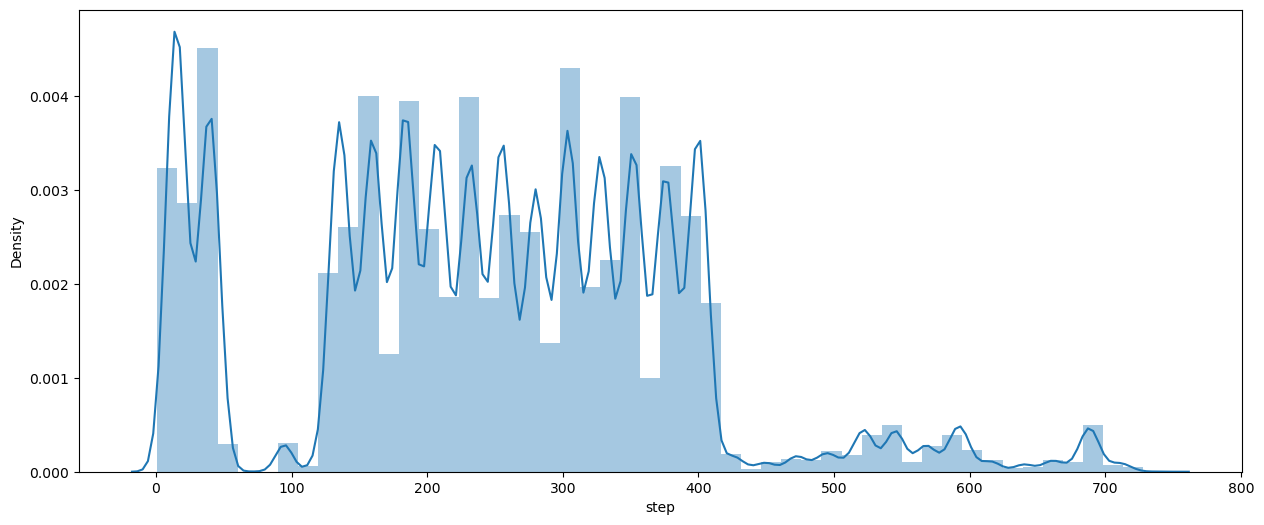

In [44]:
# Creating a displot of column ('step').

plt.figure(figsize=(15, 6))

sns.distplot(df['step'], bins=50)

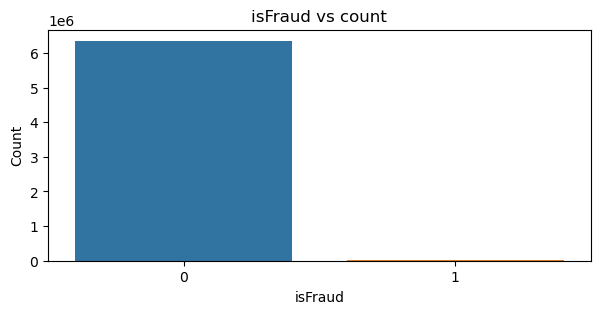

In [45]:
# Creating a countplot of column ('isFraud').

plt.figure(figsize=(7,3))
plt.title('isFraud vs count')
sns.countplot(data = df, x = 'isFraud')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()

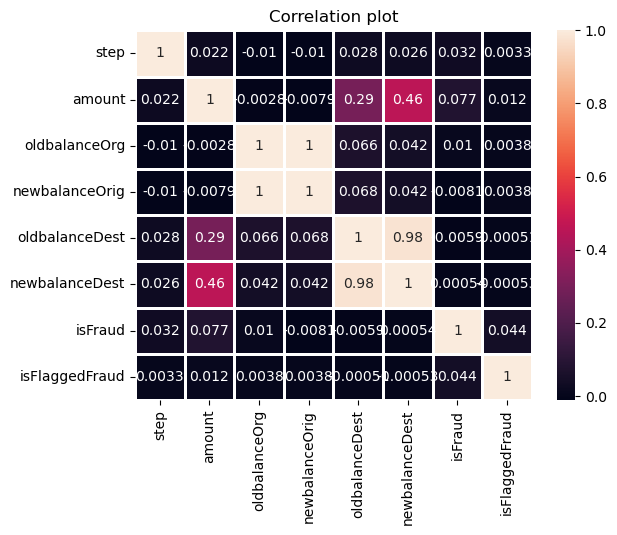

In [46]:
# Plotting correlation plot. 

corr_plot = sns.heatmap(df.corr(), annot = True, linewidths = 2)
plt.title("Correlation plot")
plt.show()

## LABEL ENCODING

In [47]:
# Importing necessary libraries for label encoding.

from sklearn import preprocessing

In [48]:
# Using label encoder on type column and finding the unique values.

label_encoder = preprocessing.LabelEncoder()
df2['type']= label_encoder.fit_transform(df2['type'])
  
df2['type'].unique()

array([1, 0])

In [49]:
df2

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,1,181.00,181.00,0.0,0.00,0.00,1
3,1,0,181.00,181.00,0.0,21182.00,0.00,1
15,1,0,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,1,215310.30,705.00,0.0,22425.00,0.00,0
24,1,1,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,0,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,1,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,0,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,1,850002.52,850002.52,0.0,0.00,0.00,1


## BALANCING DATA 

In [50]:
# Importing necessary libraries for data imbalance.

from imblearn.over_sampling import SMOTE

In [51]:
# Splitting the target variable and other variable.

X = df2.drop('isFraud', axis=1)
Y = df2['isFraud']

In [52]:
# Finding desired minority samples for column ('isFraud').

desired_minority_samples = int(1 * len(df1["isFraud"] == 0))
desired_minority_samples

4211109

In [53]:
# Applying SMOTE function to generate synthetic samples.

smote = SMOTE(sampling_strategy = 1)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

In [54]:
# Checking the value counts of column ('isFraud').

Y_resampled.value_counts()

1    2759753
0    2759753
Name: isFraud, dtype: int64

In [55]:
# Creating a new dataset with joining the resampled data. 

final_data = pd.concat([X_resampled, Y_resampled], axis=1, join='inner')

In [56]:
final_data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,1.810000e+02,1.810000e+02,0.0,0.000000,0.000000e+00,1
1,1,0,1.810000e+02,1.810000e+02,0.0,21182.000000,0.000000e+00,1
2,1,0,2.291339e+05,1.532500e+04,0.0,5083.000000,5.151344e+04,0
3,1,1,2.153103e+05,7.050000e+02,0.0,22425.000000,0.000000e+00,0
4,1,1,3.116859e+05,1.083500e+04,0.0,6267.000000,2.719173e+06,0
...,...,...,...,...,...,...,...,...
5519501,469,0,4.732078e+05,4.732078e+05,0.0,0.000000,4.732078e+05,1
5519502,437,0,2.167237e+04,2.167237e+04,0.0,0.000000,2.167237e+04,1
5519503,427,0,5.030514e+06,5.030514e+06,0.0,377973.392357,5.408488e+06,1
5519504,417,0,3.283812e+06,3.283812e+06,0.0,165268.202272,3.449080e+06,1


## Train - Test Split

In [57]:
# Importing necessary libraries for train and test split.

from sklearn.model_selection import train_test_split

In [58]:
# Spliting data into dependent variables(X) and independent variable(y) that we would predict.

X = final_data.drop("isFraud", axis = 1)
y = final_data['isFraud']

In [59]:
# Spliting X and y into train and test data.

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.8)

In [60]:
# Getting the shape of train and test data.

print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (4415604, 7)
train size y :  (4415604,)
test size X :  (1103902, 7)
test size y :  (1103902,)


In [61]:
# Importing necessary libraries for confusion matrix, classification report, accuracy score and log loss.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

## XGB CLASSIFIER

In [62]:
# # Imporitng necessary library for XGBClassifier.

from xgboost import XGBClassifier

In [63]:
# Fitting the XGBClassifier model to train data.

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [64]:
# Predicting the target value.

test_predict = model.predict(X_test)
train_predict = model.predict(X_train)

In [65]:
# Getting the accuracy score.

train_accuracy = accuracy_score(y_train, train_predict)
test_accuracy = accuracy_score(y_test, test_predict)

print(train_accuracy)
print(test_accuracy)

0.9981203024546585
0.9980297164059854


In [66]:
# Creatting confusion matrix.

cm = confusion_matrix(y_test, test_predict)
print("confusion Matrix is :",cm)

confusion Matrix is : [[549746   1704]
 [   471 551981]]


In [67]:
# Getting the classification report.

print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    551450
           1       1.00      1.00      1.00    552452

    accuracy                           1.00   1103902
   macro avg       1.00      1.00      1.00   1103902
weighted avg       1.00      1.00      1.00   1103902



In [68]:
# Getting the log loss. 

log_loss(y_test, test_predict)

0.06805241875904999

## DECISION TREE

In [69]:
# Imporitng necessary library for decision tree.

from sklearn.tree import DecisionTreeClassifier

In [70]:
# Performing grid search with cross-validation.

model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
# Predicting the target value.

test_predict1 = model1.predict(X_test)
train_predict1 = model1.predict(X_train)

In [72]:
# Getting the accuracy score.

train_accuracy1 = accuracy_score(y_train, train_predict1)
test_accuracy1 = accuracy_score(y_test, test_predict1)

print(train_accuracy1)
print(test_accuracy1)

1.0
0.9990696637926193


In [73]:
# Creatting confusion matrix.

cm = confusion_matrix(y_test, test_predict1)
print("confusion Matrix is :",cm)

confusion Matrix is : [[550752    698]
 [   329 552123]]


In [74]:
# Getting the classification report.

print(classification_report(y_test,test_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    551450
           1       1.00      1.00      1.00    552452

    accuracy                           1.00   1103902
   macro avg       1.00      1.00      1.00   1103902
weighted avg       1.00      1.00      1.00   1103902



In [75]:
# Getting the log loss. 

log_loss(y_test, test_predict1)

0.03213317982627138

## FEATURE SCALLING

In [76]:
# Importing necessary libraries for feature scaling.

from sklearn.preprocessing import StandardScaler

In [77]:
# Fitting the standard scaler model to scale data.

scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

## LOGISTIC REGRESSION

In [78]:
# Importing necessary libraries for logistic regression.

from sklearn.linear_model import LogisticRegression

In [79]:
# Fitting the logistic regression model into data.

model2 = LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression()

In [80]:
# Predicting the target value.

test_predict2 = model2.predict(X_test)
train_predict2 = model2.predict(X_train)

In [81]:
# Getting the accuracy score.

train_accuracy2 = accuracy_score(y_train, train_predict2)
test_accuracy2 = accuracy_score(y_test, test_predict2)

print(train_accuracy2)
print(test_accuracy2)

0.9496089323227355
0.9490353310348201


In [82]:
# Creatting confusion matrix.

cm = confusion_matrix(y_test, test_predict2)
print("confusion Matrix is :",cm)

confusion Matrix is : [[521119  30331]
 [ 25929 526523]]


In [83]:
# Getting the classification report.

print(classification_report(y_test,test_predict2))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95    551450
           1       0.95      0.95      0.95    552452

    accuracy                           0.95   1103902
   macro avg       0.95      0.95      0.95   1103902
weighted avg       0.95      0.95      0.95   1103902



In [84]:
# Getting the log loss. 

log_loss(y_test, test_predict2)

1.7602792753046288

In [85]:
# Importing necessary libraries for creating pickle file.

import pickle
from joblib import dump, load

In [86]:
# Saving the pickle file.

pickle.dump(model1, open(r"D:\FINAL PROJECT\model.pkl", 'wb'))